In [137]:
import copy
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment=None

df_proposals = pd.read_csv('data/opps-props-orgs-questions-22.7.8.csv')
df_proposals.head(20)

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,codeChallengeWeight,scenarioWeight,priceWeight,orgsId,legalName,city,region,country,maxQuestionScore,questionsOppVersion
0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,2c053045-ae14-4412-b922-335eeefc3015,2020-05-28 02:47:21.822000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.00,90.00,75.00000,12.00,NOT_AWARDED,...,40,25,10,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Sierra Systems Group,Vancouver,British Columbia,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,fc760584-5514-4885-a35c-9aa6a8ec49b0,2020-05-14 00:44:57.993000 +00:00,32053859-cd7b-421a-b272-28584d6eb6a9,Proponent 5,NaN,NaN,NaN,8.00,EVALUATED_QUESTIONS,...,40,25,10,32053859-cd7b-421a-b272-28584d6eb6a9,Imaginet Resources Corp.,Winnipeg,MB,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
2,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.00,56.00,75.00000,11.00,NOT_AWARDED,...,40,25,10,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Daitan Labs of Canada Inc.,Victoria,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
3,f1f6aca3-7143-41bc-99a7-8ce7014ac242,8f68c34c-b535-4f12-aff7-b38fcc11c38a,2020-05-14 00:45:24.394000 +00:00,64b67d7c-2769-48e1-92db-b811e782f8bd,Proponent 7,NaN,NaN,NaN,7.00,EVALUATED_QUESTIONS,...,40,25,10,64b67d7c-2769-48e1-92db-b811e782f8bd,Powershifter Digital Inc.,Vancouver,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.00000,13.00,AWARDED,...,40,25,10,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
5,f1f6aca3-7143-41bc-99a7-8ce7014ac242,086b524c-03cf-41c2-a531-57c5efe7cb85,2020-05-14 00:42:11.119000 +00:00,a8236d8c-a1b6-499b-8688-4a3c7210fa42,Proponent 3,NaN,NaN,NaN,8.00,EVALUATED_QUESTIONS,...,40,25,10,a8236d8c-a1b6-499b-8688-4a3c7210fa42,Nortal Solutions B.C.,Vancouver,British Columbia,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
6,f1f6aca3-7143-41bc-99a7-8ce7014ac242,d3c17bff-084e-4a24-9c48-8260672e3366,2020-05-14 00:46:10.826000 +00:00,77bd3228-ca2a-4baf-8d43-970e30c9241c,Proponent 10,NaN,NaN,NaN,6.00,EVALUATED_QUESTIONS,...,40,25,10,77bd3228-ca2a-4baf-8d43-970e30c9241c,Wolf & Crown Ind.,New westminster,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
7,f1f6aca3-7143-41bc-99a7-8ce7014ac242,71f7b09d-61fd-4efb-96c1-904068a5be5e,2020-05-14 00:46:46.126000 +00:00,befeb269-37fc-4e9b-ad7d-ce08b9e8aadf,Proponent 12,NaN,NaN,NaN,9.00,EVALUATED_QUESTIONS,...,40,25,10,befeb269-37fc-4e9b-ad7d-ce08b9e8aadf,BinaryOps Software Inc.,Victoria,British Columbia,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
8,f1f6aca3-7143-41bc-99a7-8ce7014ac242,942b5f6d-d87f-4754-a1ed-e56c50aaf83e,2020-05-28 02:47:21.822000 +00:00,d087539f-6824-4322-9dae-5117556569e4,Proponent 9,100.00,58.00,79.36508,10.00,NOT_AWARDED,...,40,25,10,d087539f-6824-4322-9dae-5117556569e4,AOT Technologies,Victoria,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b
9,f1f6aca3-7143-41bc-99a7-8ce7014ac242,5d839523-3b19-440f-9a5b-b753ad322175,2020-05-14 00:46:30.903000 +00:00,a414d09a-6be0-4203-9d10-b5b79bc03368,Proponent 11,NaN,NaN,NaN,8.00,EVALUATED_QUESTIONS,...,40,25,10,a414d09a-6be0-4203-9d10-b5b79bc03368,Quartech Systems Limited,Victoria,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b


In [138]:
df_proposals.shape

(129, 29)

In [139]:
## see if there are any null values to determine if rows can be eliminated
df_proposals.isna().sum()

opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    10
challengeScore            79
scenarioScore             86
priceScore                86
teamquestions             11
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             6
mandatorySkills            0
optionalSkills            29
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
legalName                  0
city                       0
region                     0
country                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [140]:

# replace instances of NaN with 0 in columns with calculations
df_proposals['teamquestions']=df_proposals['teamquestions'].fillna(0)
df_proposals['challengeScore']=df_proposals['challengeScore'].fillna(0)
df_proposals['scenarioScore']=df_proposals['scenarioScore'].fillna(0)
df_proposals['priceScore']=df_proposals['priceScore'].fillna(0)
df_proposals['optionalSkills']=df_proposals['optionalSkills'].fillna('')

df_proposals.isna().sum()


opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    10
challengeScore             0
scenarioScore              0
priceScore                 0
teamquestions              0
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             6
mandatorySkills            0
optionalSkills             0
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
legalName                  0
city                       0
region                     0
country                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [141]:


# use the combined weight and score to come up with a calculated score for each phase and total
df_proposals['tq_calculated']=(df_proposals['teamquestions'] / df_proposals['maxQuestionScore']) * 100 * df_proposals['questionsWeight'] / 100
df_proposals['cc_calculated']=df_proposals['codeChallengeWeight'] * df_proposals['challengeScore'] / 100
df_proposals['ts_calculated']=df_proposals['scenarioWeight'] * df_proposals['scenarioScore'] / 100
df_proposals['p_calculated']=df_proposals['priceWeight'] * df_proposals['priceScore'] / 100
df_proposals['total_score']=df_proposals['cc_calculated'] + df_proposals['ts_calculated'] + df_proposals['p_calculated'] + df_proposals['tq_calculated']
df_proposals

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,city,region,country,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,2c053045-ae14-4412-b922-335eeefc3015,2020-05-28 02:47:21.822000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.0,90.0,75.0,12.0,NOT_AWARDED,...,Vancouver,British Columbia,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,20.000000,40.000,22.50,7.5,90.000000
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,fc760584-5514-4885-a35c-9aa6a8ec49b0,2020-05-14 00:44:57.993000 +00:00,32053859-cd7b-421a-b272-28584d6eb6a9,Proponent 5,0.0,0.0,0.0,8.0,EVALUATED_QUESTIONS,...,Winnipeg,MB,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,13.333333,0.000,0.00,0.0,13.333333
2,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.0,56.0,75.0,11.0,NOT_AWARDED,...,Victoria,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,18.333333,38.400,14.00,7.5,78.233333
3,f1f6aca3-7143-41bc-99a7-8ce7014ac242,8f68c34c-b535-4f12-aff7-b38fcc11c38a,2020-05-14 00:45:24.394000 +00:00,64b67d7c-2769-48e1-92db-b811e782f8bd,Proponent 7,0.0,0.0,0.0,7.0,EVALUATED_QUESTIONS,...,Vancouver,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,11.666667,0.000,0.00,0.0,11.666667
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.0,76.0,100.0,13.0,AWARDED,...,Vancouver,British Columbia (BC),Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,21.666667,40.000,19.00,10.0,90.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,aaaebeec-ff9c-4777-82d7-dc032befd337,da3bbfd7-96d3-4e57-bb21-7e8e0f30b141,2020-12-15 18:48:05.875000 +00:00,d271a245-df05-4aef-9545-3942030925be,NaN,0.0,0.0,0.0,0.0,SUBMITTED,...,Vancouver,British Columbia,Canada,100,e541e76e-5f54-4ad5-a549-8a7703f680a5,0.000000,0.000,0.00,0.0,0.000000
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,0cafeaf6-5f27-48a2-8591-d276bd65f609,2020-09-14 20:06:50.951000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 2,0.0,0.0,0.0,13.0,EVALUATED_CODE_CHALLENGE,...,Calgary,Alberta,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,13.000000,0.000,0.00,0.0,13.000000
126,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.0,0.0,0.0,8.0,EVALUATED_CODE_CHALLENGE,...,Vancouver,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,8.000000,0.000,0.00,0.0,8.000000
127,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.9,91.0,100.0,23.0,AWARDED,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,23.000000,34.615,31.85,5.0,94.465000


In [142]:
# see if there are any outliers that verifies calculations
df_proposals['total_score'].describe()

count    129.000000
mean      35.393332
std       32.184609
min        0.000000
25%       11.875000
50%       16.750000
75%       74.142500
max       94.465000
Name: total_score, dtype: float64

<AxesSubplot:>

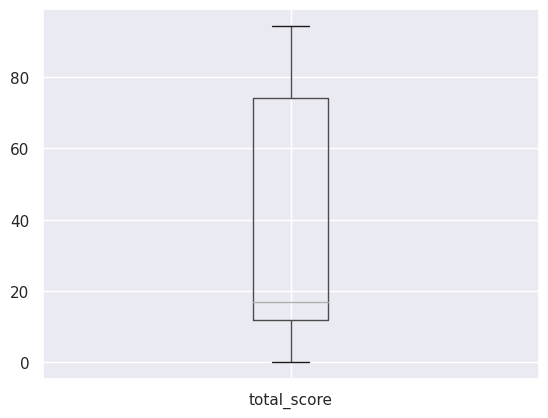

In [143]:
df_proposals.boxplot(column='total_score')

In [144]:
# drop rows that contain zero for total score
df_props = df_proposals.loc[(df_proposals['total_score'] != 0)]
df_props

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,city,region,country,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,2c053045-ae14-4412-b922-335eeefc3015,2020-05-28 02:47:21.822000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.00,90.00,75.00000,12.00,NOT_AWARDED,...,Vancouver,British Columbia,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,20.000000,40.000,22.5000,7.500000,90.000000
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,fc760584-5514-4885-a35c-9aa6a8ec49b0,2020-05-14 00:44:57.993000 +00:00,32053859-cd7b-421a-b272-28584d6eb6a9,Proponent 5,0.00,0.00,0.00000,8.00,EVALUATED_QUESTIONS,...,Winnipeg,MB,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,13.333333,0.000,0.0000,0.000000,13.333333
2,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.00,56.00,75.00000,11.00,NOT_AWARDED,...,Victoria,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,18.333333,38.400,14.0000,7.500000,78.233333
3,f1f6aca3-7143-41bc-99a7-8ce7014ac242,8f68c34c-b535-4f12-aff7-b38fcc11c38a,2020-05-14 00:45:24.394000 +00:00,64b67d7c-2769-48e1-92db-b811e782f8bd,Proponent 7,0.00,0.00,0.00000,7.00,EVALUATED_QUESTIONS,...,Vancouver,BC,Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,11.666667,0.000,0.0000,0.000000,11.666667
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.00000,13.00,AWARDED,...,Vancouver,British Columbia (BC),Canada,15,030383cd-1cf3-46d1-817a-0ba63b35999b,21.666667,40.000,19.0000,10.000000,90.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,7e66873f-fa48-47b3-9bc7-5667bb7ce254,1c4c3efe-6c0d-42e7-8d55-1f42a28c2f39,2022-02-24 21:54:50.719000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 4,83.42,55.67,58.67347,16.33,NOT_AWARDED,...,Victoria,BC,Canada,30,26269fe5-0a00-4323-a9c8-98a92401a4ea,13.608333,33.368,13.9175,5.867347,66.761180
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,0cafeaf6-5f27-48a2-8591-d276bd65f609,2020-09-14 20:06:50.951000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 2,0.00,0.00,0.00000,13.00,EVALUATED_CODE_CHALLENGE,...,Calgary,Alberta,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,13.000000,0.000,0.0000,0.000000,13.000000
126,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.00,0.00,0.00000,8.00,EVALUATED_CODE_CHALLENGE,...,Vancouver,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,8.000000,0.000,0.0000,0.000000,8.000000
127,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.90,91.00,100.00000,23.00,AWARDED,...,Victoria,BC,Canada,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,23.000000,34.615,31.8500,5.000000,94.465000


In [145]:

# rank the teamquestions and group by opportunity
for method in ['first']:
    df_props['overallRank'] = df_props.groupby('opportunity')['total_score'].rank(method, ascending=False)
    df_props['tq_rank'] = df_props.groupby('opportunity')['tq_calculated'].rank(method, ascending=False)
    df_props['ts_rank'] = df_props.groupby('opportunity')['ts_calculated'].rank(method, ascending=False)
    df_props['cc_rank'] = df_props.groupby('opportunity')['cc_calculated'].rank(method, ascending=False)
    df_props['p_rank'] = df_props.groupby('opportunity')['p_calculated'].rank(method, ascending=False)
df_props
# df_nan_proposals = df_proposals.dropna(axis=0,subset=["anonymousProponentName","teamquestions"]).drop_duplicates()
# df_nan_proposals.shape

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score,overallRank,tq_rank,ts_rank,cc_rank,p_rank
0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,2c053045-ae14-4412-b922-335eeefc3015,2020-05-28 02:47:21.822000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.00,90.00,75.00000,12.00,NOT_AWARDED,...,20.000000,40.000,22.5000,7.500000,90.000000,2.0,2.0,1.0,1.0,3.0
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,fc760584-5514-4885-a35c-9aa6a8ec49b0,2020-05-14 00:44:57.993000 +00:00,32053859-cd7b-421a-b272-28584d6eb6a9,Proponent 5,0.00,0.00,0.00000,8.00,EVALUATED_QUESTIONS,...,13.333333,0.000,0.0000,0.000000,13.333333,7.0,7.0,5.0,5.0,5.0
2,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.00,56.00,75.00000,11.00,NOT_AWARDED,...,18.333333,38.400,14.0000,7.500000,78.233333,4.0,3.0,4.0,4.0,4.0
3,f1f6aca3-7143-41bc-99a7-8ce7014ac242,8f68c34c-b535-4f12-aff7-b38fcc11c38a,2020-05-14 00:45:24.394000 +00:00,64b67d7c-2769-48e1-92db-b811e782f8bd,Proponent 7,0.00,0.00,0.00000,7.00,EVALUATED_QUESTIONS,...,11.666667,0.000,0.0000,0.000000,11.666667,11.0,11.0,6.0,6.0,6.0
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.00000,13.00,AWARDED,...,21.666667,40.000,19.0000,10.000000,90.666667,1.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,7e66873f-fa48-47b3-9bc7-5667bb7ce254,1c4c3efe-6c0d-42e7-8d55-1f42a28c2f39,2022-02-24 21:54:50.719000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 4,83.42,55.67,58.67347,16.33,NOT_AWARDED,...,13.608333,33.368,13.9175,5.867347,66.761180,3.0,4.0,3.0,2.0,2.0
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,0cafeaf6-5f27-48a2-8591-d276bd65f609,2020-09-14 20:06:50.951000 +00:00,3f497cb0-1672-4fc3-9c3d-f82621481c30,Proponent 2,0.00,0.00,0.00000,13.00,EVALUATED_CODE_CHALLENGE,...,13.000000,0.000,0.0000,0.000000,13.000000,3.0,3.0,2.0,3.0,2.0
126,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,6150cf20-05d9-4845-b565-f1c3705e4472,2020-09-14 20:06:32.546000 +00:00,c1a0ffbe-2194-45e1-b9f2-44c8c55d883c,Proponent 4,0.00,0.00,0.00000,8.00,EVALUATED_CODE_CHALLENGE,...,8.000000,0.000,0.0000,0.000000,8.000000,4.0,4.0,3.0,4.0,3.0
127,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.90,91.00,100.00000,23.00,AWARDED,...,23.000000,34.615,31.8500,5.000000,94.465000,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'overall rank distribution'}, ylabel='Frequency'>

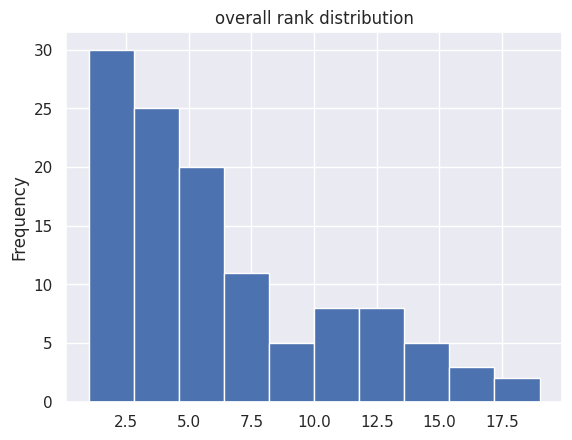

In [146]:
df_props['overallRank'].plot(kind='hist', title='overall rank distribution')

<AxesSubplot:title={'center':'Participation frequency by city'}, xlabel='city'>

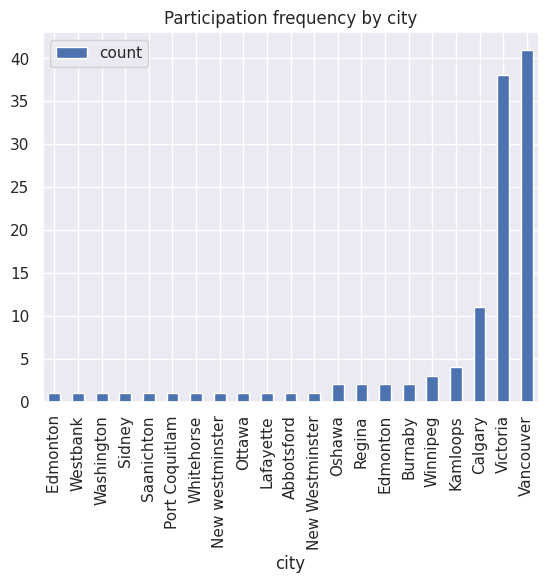

In [147]:
df_props['count'] = 1
df_props[['city','count']].groupby('city').count().sort_values(by='count',ascending=True).plot.bar(title='Participation frequency by city')


In [148]:
# drop rows that contain zero for total score
df_props = df_props.loc[(df_props['overallRank'] <= 4)]
df_props

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,cc_calculated,ts_calculated,p_calculated,total_score,overallRank,tq_rank,ts_rank,cc_rank,p_rank,count
0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,2c053045-ae14-4412-b922-335eeefc3015,2020-05-28 02:47:21.822000 +00:00,73064d46-e6a0-4dec-bcf6-d26b10b190fc,Proponent 2,100.00,90.00,75.000000,12.00,NOT_AWARDED,...,40.0000,22.5000,7.500000,90.000000,2.0,2.0,1.0,1.0,3.0,1
2,f1f6aca3-7143-41bc-99a7-8ce7014ac242,c9b153de-dea4-4392-830b-2eb8dabec452,2020-05-28 02:47:21.822000 +00:00,ae857e14-6ce6-4330-a2fd-8fdbc156560b,Proponent 6,96.00,56.00,75.000000,11.00,NOT_AWARDED,...,38.4000,14.0000,7.500000,78.233333,4.0,3.0,4.0,4.0,4.0,1
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.000000,13.00,AWARDED,...,40.0000,19.0000,10.000000,90.666667,1.0,1.0,2.0,2.0,1.0,1
8,f1f6aca3-7143-41bc-99a7-8ce7014ac242,942b5f6d-d87f-4754-a1ed-e56c50aaf83e,2020-05-28 02:47:21.822000 +00:00,d087539f-6824-4322-9dae-5117556569e4,Proponent 9,100.00,58.00,79.365080,10.00,NOT_AWARDED,...,40.0000,14.5000,7.936508,79.103175,3.0,4.0,3.0,3.0,2.0,1
13,ab3f56b2-c309-491b-9c9b-68b24ebee5eb,91399797-b015-423b-8a49-5784922ae604,2022-02-18 16:22:46.354000 +00:00,fa80fa19-ae38-4283-a92f-d7cd94da9a47,Proponent 2,97.04,90.67,100.000000,26.50,AWARDED,...,38.8160,22.6675,10.000000,82.525167,1.0,2.0,1.0,1.0,1.0,1
15,ab3f56b2-c309-491b-9c9b-68b24ebee5eb,754bd779-9edd-4414-a195-84b141901c04,2022-02-18 16:22:46.354000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 1,88.80,64.33,94.791630,46.00,NOT_AWARDED,...,35.5200,16.0825,9.479163,80.248330,2.0,1.0,2.0,2.0,2.0,1
16,f508d747-8877-46f8-8818-59f71a65416a,de8eb207-0671-477d-9d52-68aca6f0334c,2022-05-30 19:30:12.006000 +00:00,736e06ac-f6cd-4e9e-a504-2fee6a0327c7,Proponent 1,90.52,86.71,96.470590,18.50,AWARDED,...,22.6300,34.6840,9.647059,85.461059,1.0,4.0,1.0,1.0,2.0,1
18,f508d747-8877-46f8-8818-59f71a65416a,012a099c-ca3e-4ce7-9227-7d76dc5752bd,2022-05-30 19:30:12.006000 +00:00,c9c50436-a584-4acb-8bba-92fede609480,Proponent 4,86.36,65.46,100.000000,18.75,NOT_AWARDED,...,21.5900,26.1840,10.000000,76.524000,4.0,3.0,4.0,2.0,1.0,1
34,f508d747-8877-46f8-8818-59f71a65416a,6ab4de26-a4b3-46e9-8da5-04a589d4c3d5,2022-05-30 19:30:12.006000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 14,84.92,74.83,91.111115,19.75,NOT_AWARDED,...,21.2300,29.9320,9.111111,80.023111,2.0,2.0,2.0,4.0,4.0,1
35,f508d747-8877-46f8-8818-59f71a65416a,1a47805f-0bac-43ce-88b7-aa7e31a55bf0,2022-05-30 19:30:12.006000 +00:00,d087539f-6824-4322-9dae-5117556569e4,Proponent 3,85.84,66.20,91.212456,20.50,NOT_AWARDED,...,21.4600,26.4800,9.121246,77.561246,3.0,1.0,3.0,3.0,3.0,1


In [149]:
# take a subset of the dataframe
df_sub = df_props[['anonymousProponentName','city','region','country','mandatorySkills','optionalSkills','tq_calculated','ts_calculated','p_calculated','cc_calculated','tq_rank','cc_rank','ts_rank','p_rank','overallRank','opportunity','status','total_score','legalName','count']]

# aggregate all rows by opportunity
df_agg=df_sub.groupby('opportunity').aggregate(lambda x: ','.join(map(str, x)))
df_agg


,anonymousProponentName,city,region,country,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,status,total_score,legalName,count
opportunity,,,,,,,,,,,,,,,,,,,
04003a5f-f609-469f-91bb-f3c6ac56bed7,"Proponent 2,Proponent 1","Victoria,Victoria","BC,BC","Canada,Canada","{Front-End Development,React,NodeJS,Back-End D...",",","13.0,16.52941176470588","12.25,17.85","10.0,9.846154","29.1,26.7","2.0,1.0","1.0,2.0","2.0,1.0","1.0,2.0","2.0,1.0","NOT_AWARDED,AWARDED","64.35,70.92556576470588","Button Inc.,Quartech Systems Limited","1,1"
442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,"Proponent 2,Proponent 4,Proponent 3,Proponent 1","Calgary,Vancouver,Victoria,Victoria","Alberta,BC,BC,BC","Canada,Canada,Canada,Canada","{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...","13.0,8.0,23.0,14.000000000000002","0.0,0.0,31.85,0.0","0.0,0.0,5.0,0.0","0.0,0.0,34.615,26.705","3.0,4.0,1.0,2.0","3.0,4.0,1.0,2.0","2.0,3.0,1.0,4.0","2.0,3.0,1.0,4.0","3.0,4.0,1.0,2.0","EVALUATED_CODE_CHALLENGE,EVALUATED_CODE_CHALLE...","13.0,8.0,94.465,40.705","Appddiction Studio, LLC,Prakash Consulting Inc...","1,1,1,1"
5e32d776-a4b6-48f3-adb5-8fd6c38462cb,"Proponent 2,Proponent 6,Proponent 4,Proponent 1","Vancouver,Burnaby,Victoria,Victoria","British Columbia,BC,BC,BC","Canada,Canada,Canada,Canada","{Salesforce,Scrum},{Salesforce,Scrum},{Salesfo...","{OpenShift,DevOps,HL7},{OpenShift,DevOps,HL7},...","31.1,29.4,35.3,26.1","40.5,31.0,43.5,39.25","10.0,9.0625,8.923077000000001,8.9841415","0.0,0.0,0.0,0.0","2.0,3.0,1.0,4.0","1.0,3.0,5.0,6.0","2.0,4.0,1.0,3.0","1.0,2.0,4.0,3.0","2.0,4.0,1.0,3.0","NOT_AWARDED,NOT_AWARDED,AWARDED,NOT_AWARDED","81.6,69.4625,87.72307699999999,74.3341415","Sierra Systems Group,Traction Sales And Market...","1,1,1,1"
76d04eca-334f-44b0-ac74-08910851715f,"Proponent 2,Proponent 11,Proponent 12,Proponen...","Vancouver,Victoria,Victoria,Victoria","British Columbia,BC,BC,BC","Canada,Canada,Canada,Canada","{Agile,Back-End Development,Data Analysis,Fron...","{Geographic Information Systems,Data Visualiza...","18.125,16.875,19.0625,16.875","29.288,34.444,30.024,16.488","9.768638,10.0,9.5,9.774769000000001","22.0425,23.7775,24.5125,20.26","2.0,3.0,1.0,4.0","3.0,2.0,1.0,4.0","3.0,1.0,2.0,4.0","3.0,1.0,4.0,2.0","3.0,1.0,2.0,4.0","NOT_AWARDED,AWARDED,NOT_AWARDED,NOT_AWARDED","79.224138,85.0965,83.099,63.397769000000004","Sierra Systems Group,Daitan Labs of Canada Inc...","1,1,1,1"
7e66873f-fa48-47b3-9bc7-5667bb7ce254,"Proponent 1,Proponent 3,Proponent 5,Proponent 4","Vancouver,Vancouver,Victoria,Victoria","BC,BC,BC,BC","Canada,Canada,Canada,Canada","{Scrum,Service Design,Solution Architecture,Ba...",",,,","14.441666666666668,17.775,20.283333333333335,1...","14.6675,0.0,21.25,13.9175","10.0,0.0,5.75,5.867347","32.044000000000004,27.4,37.56399999999999,33.368","3.0,2.0,1.0,4.0","3.0,4.0,1.0,2.0","2.0,6.0,1.0,3.0","1.0,6.0,3.0,2.0","2.0,4.0,1.0,3.0","NOT_AWARDED,EVALUATED_CODE_CHALLENGE,AWARDED,N...","71.15316666666666,45.175,84.84733333333332,66....","Convergence Concepts Inc,Powershifter Digital ...","1,1,1,1"
ab3f56b2-c309-491b-9c9b-68b24ebee5eb,"Proponent 2,Proponent 1","Kamloops,Victoria","BC,BC","Canada,Canada","{Agile,Back-End Development,Bootstrap UI Toolk...",",","11.041666666666664,19.166666666666668","22.6675,16.0825","10.0,9.479163","38.816,35.52","2.0,1.0","1.0,2.0","1.0,2.0","1.0,2.0","1.0,2.0","AWARDED,NOT_AWARDED","82.52516666666668,80.24832966666668","Digital Convergence Canada,FreshWorks Studio","1,1"
b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,"Proponent 3,Proponent 5,Proponent 1,Proponent 6","Victoria,Vancouver,Victoria,Victoria","BC,British Columbia,BC,BC","Canada,Canada,Canada,Canada","{Agile,Data Visualization,DevOps,Front-End Dev...",",,,","15.755813953488376,21.046511627906977,17.67441...","0.0,0.0,0.0,0.0","0.0,0.0,0.0,0.0","0.0,0.0,0.0,0.0","4.0,1.0,3.0,2.0","2.0,3.0,5.0,6.0","2.0,3.0,5.0,6.0","2.0,3.0,5.0,6.0","4.0,1.0,

In [150]:
# get a list of duplicated rows based on opportunity
# df_sub[df_sub['opportunity'].duplicated() == True]
df_sub.sort_values(['opportunity','overallRank'])

,anonymousProponentName,city,region,country,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,opportunity,status,total_score,legalName,count
108,Proponent 1,Victoria,BC,Canada,"{Front-End Development,React,NodeJS,Back-End D...",,16.529412,17.8500,9.846154,26.7000,1.0,2.0,1.0,2.0,1.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,AWARDED,70.925566,Quartech Systems Limited,1
107,Proponent 2,Victoria,BC,Canada,"{Front-End Development,React,NodeJS,Back-End D...",,13.000000,12.2500,10.000000,29.1000,2.0,1.0,2.0,1.0,2.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,NOT_AWARDED,64.350000,Button Inc.,1
127,Proponent 3,Victoria,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",23.000000,31.8500,5.000000,34.6150,1.0,1.0,1.0,1.0,1.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,AWARDED,94.465000,FreshWorks Studio,1
128,Proponent 1,Victoria,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",14.000000,0.0000,0.000000,26.7050,2.0,2.0,4.0,4.0,2.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,EVALUATED_CODE_CHALLENGE,40.705000,CGI Information Systems and Management Consult...,1
125,Proponent 2,Calgary,Alberta,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",13.000000,0.0000,0.000000,0.0000,3.0,3.0,2.0,2.0,3.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,EVALUATED_CODE_CHALLENGE,13.000000,"Appddiction Studio, LLC",1
126,Proponent 4,Vancouver,BC,Canada,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",8.000000,0.0000,0.000000,0.0000,4.0,4.0,3.0,3.0,4.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,EVALUATED_CODE_CHALLENGE,8.000000,Prakash Consulting Incorporated,1
113,Proponent 4,Victoria,BC,Canada,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",35.300000,43.5000,8.923077,0.0000,1.0,5.0,1.0,4.0,1.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,AWARDED,87.723077,PwC Canada,1
109,Proponent 2,Vancouver,British Columbia,Canada,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",31.100000,40.5000,10.000000,0.0000,2.0,1.0,2.0,1.0,2.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,NOT_AWARDED,81.600000,Sierra Systems Group,1
114,Proponent 1,Victoria,BC,Canada,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",26.100000,39.2500,8.984141,0.0000,4.0,6.0,3.0,3.0,3.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,NOT_AWARDED,74.334142,CGI Information Systems and Management Consult...,1
111,Proponent 6,Burnaby,BC,Canada,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",29.400000,31.0000,9.062500,0.0000,3.0,3.0,4.0,2.0,4.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,NOT_AWARDED,69.462500,Traction Sales And Marketing Inc.,1


In [151]:
df_awarded = df_sub.loc[(df_sub["status"] == 'AWARDED')]
df_awarded

,anonymousProponentName,city,region,country,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,opportunity,status,total_score,legalName,count
4,Proponent 13,Vancouver,British Columbia (BC),Canada,"{User Interface Design,User Experience Design,...","{Scrum,Wireframing,Data Visualization,HTML,RES...",21.666667,19.0000,10.000000,40.0000,1.0,2.0,2.0,1.0,1.0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,AWARDED,90.666667,Countable Web Productions Inc.,1
13,Proponent 2,Kamloops,BC,Canada,"{Agile,Back-End Development,Bootstrap UI Toolk...",,11.041667,22.6675,10.000000,38.8160,2.0,1.0,1.0,1.0,1.0,ab3f56b2-c309-491b-9c9b-68b24ebee5eb,AWARDED,82.525167,Digital Convergence Canada,1
16,Proponent 1,Victoria,BC,Canada,"{OpenShift,DevOps,Agile,User Experience Design...","{Angular,Bash,MongoDB,JavaScript,Oracle,Amazon...",18.500000,34.6840,9.647059,22.6300,4.0,1.0,1.0,2.0,1.0,f508d747-8877-46f8-8818-59f71a65416a,AWARDED,85.461059,Bit3.ca,1
43,Proponent 5,Victoria,BC,Canada,"{Agile,DevOps,Back-End Development,Git,User Ex...","{Delivery Management,Azure Cloud,Amazon Web Se...",14.400000,34.7520,9.200000,25.4160,1.0,3.0,1.0,3.0,1.0,b7c75650-f86a-4971-a738-a04a26f5d7c9,AWARDED,83.768000,FreshWorks Studio,1
45,Proponent 3,Vancouver,British Columbia,Canada,"{Agile,AI,Data Visualization,HTML,UI/UX,Machin...",{Data Science},19.100000,21.0000,8.108108,35.2000,1.0,2.0,1.0,2.0,1.0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,AWARDED,83.408108,Sierra Systems Group,1
52,Proponent 5,Vancouver,British Columbia,Canada,"{Agile,Business Analysis,Delivery Management,D...","{iOS App Development,Android App Development}",26.000000,27.2700,4.950000,24.3000,3.0,2.0,1.0,2.0,1.0,ba6b5506-fe2f-42a6-a32b-92982fe417d2,AWARDED,82.520000,Sierra Systems Group,1
81,Proponent 11,Victoria,BC,Canada,"{Agile,Back-End Development,Data Analysis,Fron...","{Geographic Information Systems,Data Visualiza...",16.875000,34.4440,10.000000,23.7775,3.0,2.0,1.0,1.0,1.0,76d04eca-334f-44b0-ac74-08910851715f,AWARDED,85.096500,Daitan Labs of Canada Inc.,1
98,Proponent 5,Victoria,BC,Canada,"{Agile,Back-End Development,DevOps,User Interf...","{OpenShift,VueJS,Jenkins,Security Engineering,...",20.000000,24.2750,9.497488,39.0000,4.0,1.0,1.0,3.0,1.0,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,AWARDED,92.772488,AOT Technologies,1
102,Proponent 4,Vancouver,British Columbia,Canada,"{.Net Core,Angular,ArgoCD,CSS,Docker,HTML,Java...",,20.769231,29.3650,12.302159,22.8575,1.0,1.0,1.0,3.0,1.0,dbd233bb-bc5b-4582-9cb6-bd2ff106ec12,AWARDED,85.293889,Sierra Systems Group,1
104,Proponent 1,Vancouver,British Columbia,Canada,"{Scrum,Quality Assurance,Wireframing,HTML,CSS,...",,23.214286,29.1000,12.041284,30.0000,1.0,1.0,1.0,2.0,1.0,e1cd1588-2c43-492b-a167-7f28cd720ae7,AWARDED,94.355570,Sierra Systems Group,1


<AxesSubplot:title={'center':'Awarded contracts by city'}, xlabel='city'>

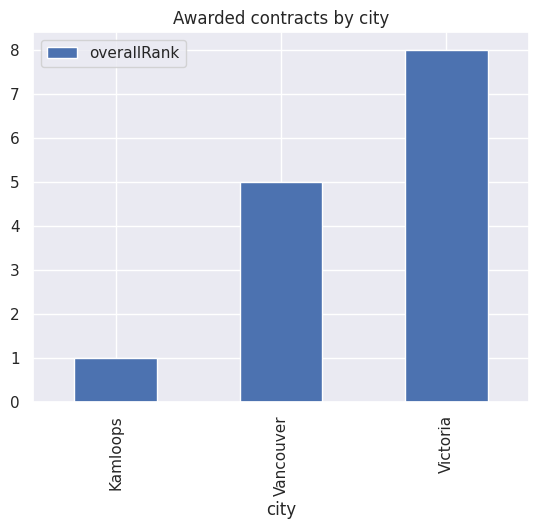

In [152]:
df_awarded[['city','overallRank']].groupby('city').count().sort_values(by='overallRank',ascending=True).plot.bar(title='Awarded contracts by city')

<AxesSubplot:title={'center':'Awarded contracts grouped by organization'}, xlabel='legalName'>

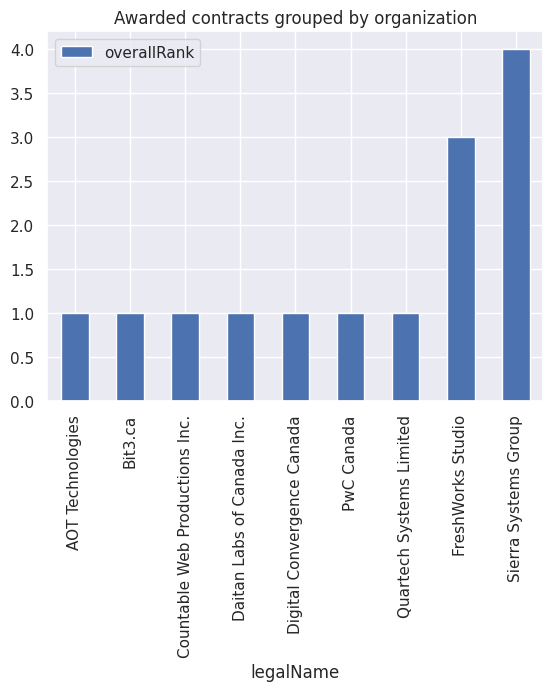

In [153]:
df_awarded[['legalName','overallRank']].groupby('legalName').count().sort_values(by='overallRank',ascending=True).plot.bar(title='Awarded contracts grouped by organization')

In [154]:
df_skills_mand = df_sub['mandatorySkills'].loc[(df_sub["status"] == 'AWARDED')]
df_skills_opt = df_sub['optionalSkills'].loc[(df_sub["status"] == 'AWARDED')]
skills_list_mand = df_skills_mand.to_list()
skills_list_opt = df_skills_opt.to_list()

# set vars
char1 = "{"
char2 = '}'
dict_mand = {}
dict_opt = {}
freq_mand = {}
freq_opt = {}
idx = 0

# string manipulation, remove unwanted characters
res_mand = [ele.replace(char1, '') for ele in skills_list_mand]
res2_mand = [ele.replace(char2, '') for ele in res_mand]
res_opt = [ele.replace(char1, '') for ele in skills_list_opt]
res2_opt = [ele.replace(char2, '') for ele in res_opt]

# convert each item to an array, save to multi-dimensional
for i in res2_mand:
    dict_mand[idx] = i.split(',')
    idx += 1
dict_mand

for i in res2_opt:
    dict_opt[idx] = i.split(',')
    idx += 1
dict_opt

# avoid runtime error
dict_mand_copy = copy.copy(dict_mand)
dict_opt_copy = copy.copy(dict_opt)

# count the frequency of words, save words as keys in new multi-dimensional array
for item in dict_mand_copy.values():
    for i in item:
        if i in freq_mand:
            freq_mand[i] += 1
        else:
            freq_mand[i] = 1

for item in dict_opt_copy.values():
    for i in item:
        if i == '':
            continue
        if i in freq_opt:
            freq_opt[i] += 1
        else:
            freq_opt[i] = 1

# sort the array in ascending order
# dict(sorted(freq.items(), key=lambda i: i[1]))
sorted(freq_mand.items(), key=operator.itemgetter(1))

[('Bootstrap UI Toolkit', 1),
 ('SQL', 1),
 ('jQuery', 1),
 ('SASS', 1),
 ('Linux', 1),
 ('Apache', 1),
 ('Drupal', 1),
 ('React-Redux', 1),
 ('Flyway', 1),
 ('AI', 1),
 ('Data Visualization', 1),
 ('UI/UX', 1),
 ('Machine Learning', 1),
 ('PowerBI', 1),
 ('GIS', 1),
 ('Data Base Administrator', 1),
 ('Business Analysis', 1),
 ('Geographic Information Systems', 1),
 ('User Flows', 1),
 ('Data Analysis', 1),
 ('solution architecture', 1),
 ('data integration design', 1),
 ('ArgoCD', 1),
 ('OAuth', 1),
 ('Patroni', 1),
 ('Tekton', 1),
 ('OpenShift Pipelines', 1),
 ('VueJS', 1),
 ('MSSQL', 1),
 ('Authentication Skills ', 1),
 ('Open ID Connect ', 1),
 ('GitHub', 1),
 ('Leaflet', 1),
 ('BC Datawarehouse integration', 1),
 ('Cloud Hosting', 1),
 ('Container ', 1),
 ('Technical Architecture ', 1),
 ('Delivery Managment', 1),
 ('UAT', 1),
 ('QA', 1),
 ('UI Design', 1),
 ('UX Design', 1),
 ('Salesforce', 1),
 ('Service Design', 1),
 ('Solution Architecture', 1),
 ('Backend Development', 1),
 (

In [155]:
sorted(freq_opt.items(), key=operator.itemgetter(1))

[('Scrum', 1),
 ('Wireframing', 1),
 ('HTML', 1),
 ('RESTful API Development', 1),
 ('PostgreSQL', 1),
 ('Docker', 1),
 ('networking', 1),
 ('Angular', 1),
 ('Bash', 1),
 ('JavaScript', 1),
 ('Oracle', 1),
 ('Microsoft Azure', 1),
 ('Delivery Management', 1),
 ('Azure Cloud', 1),
 ('User Research', 1),
 ('Data Science', 1),
 ('iOS App Development', 1),
 ('Android App Development', 1),
 ('identity management', 1),
 ('VueJS', 1),
 ('Security Engineering', 1),
 ('Flask', 1),
 ('Django', 1),
 ('DevOps', 1),
 ('HL7', 1),
 ('Back-End Development', 1),
 ('Data Analysis', 1),
 ('Microsoft Dynamics', 1),
 ('Quality Assurance', 1),
 ('Penetration Testing', 1),
 ('MongoDB', 2),
 ('Jenkins', 2),
 ('Geographic Information Systems', 2),
 ('Data Visualization', 3),
 ('Amazon Web Services', 3),
 ('OpenShift', 3)]

In [156]:
# average team size
df_props['minTeamMembers'].loc[(df_props["status"] == 'AWARDED')].mean()

3.8461538461538463

In [157]:
df_weights = df_props[['opportunity','questionsWeight','codeChallengeWeight','scenarioWeight','priceWeight']].loc[(df_sub["status"] == 'AWARDED')]
df_weights

,opportunity,questionsWeight,codeChallengeWeight,scenarioWeight,priceWeight
4,f1f6aca3-7143-41bc-99a7-8ce7014ac242,25,40,25,10
13,ab3f56b2-c309-491b-9c9b-68b24ebee5eb,25,40,25,10
16,f508d747-8877-46f8-8818-59f71a65416a,25,25,40,10
43,b7c75650-f86a-4971-a738-a04a26f5d7c9,20,30,40,10
45,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,25,40,25,10
52,ba6b5506-fe2f-42a6-a32b-92982fe417d2,35,30,30,5
81,76d04eca-334f-44b0-ac74-08910851715f,25,25,40,10
98,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,25,40,25,10
102,dbd233bb-bc5b-4582-9cb6-bd2ff106ec12,25,25,35,15
104,e1cd1588-2c43-492b-a167-7f28cd720ae7,25,30,30,15


<AxesSubplot:xlabel='opportunity'>

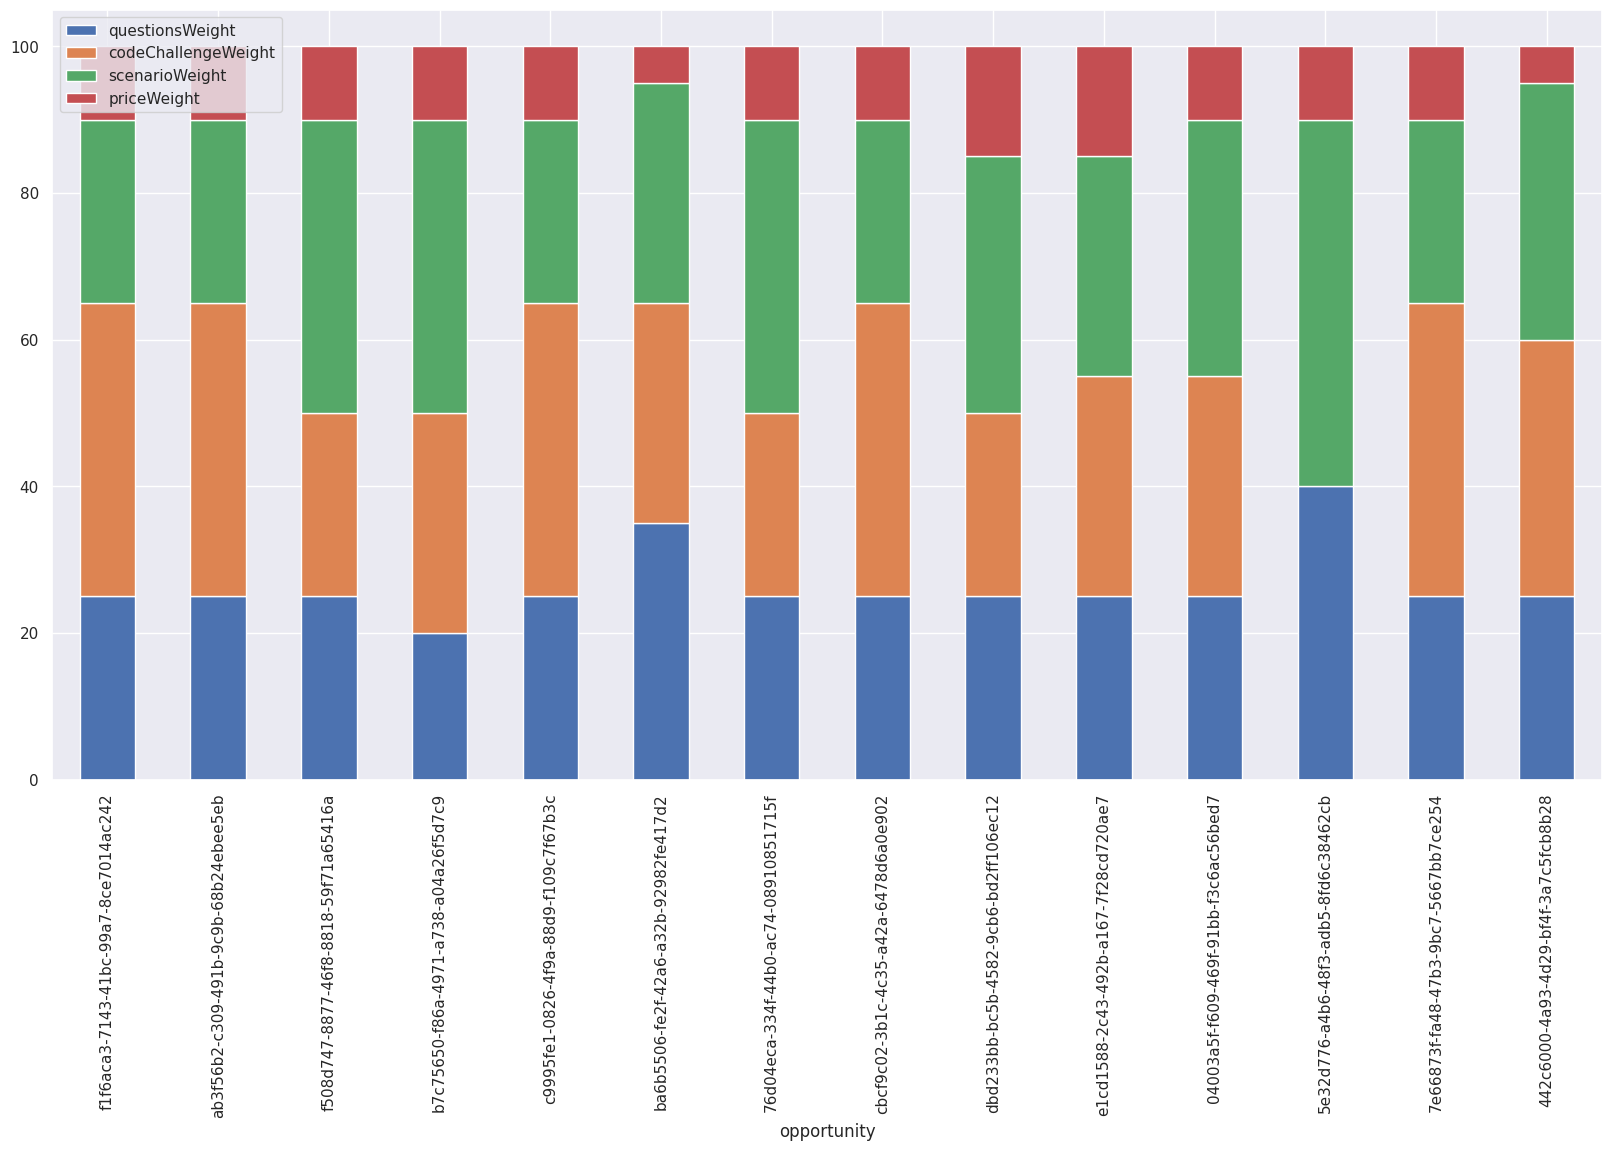

In [158]:
df_weights.plot(x='opportunity', y=['questionsWeight', 'codeChallengeWeight', 'scenarioWeight', 'priceWeight'], kind='bar', figsize=(20,10), stacked=True)

In [159]:
# there is a negative correlation with team questions and rank, which is consistent with the lower the score for team questions the higher the rank, or the greatest number
df_sub["tq_rank"].corr(df_sub['overallRank'], method="spearman")

0.478747591522158

In [160]:
# team scenario scores are negatively correlated with rank, consistent with lower scores contributing to a greater rank number
df_sub["ts_rank"].corr(df_sub['overallRank'], method="spearman")

0.8365934715172514

In [161]:
df_sub["cc_rank"].corr(df_sub['overallRank'], method="spearman")

0.4662061899496131

In [162]:
df_sub["p_rank"].corr(df_sub['overallRank'], method="spearman")

0.26733725662846775

In [163]:
x = df_sub['ts_rank'].to_list()
y = df_sub['overallRank'].to_list()
#least_squares = np.linalg.lstsq(x,y, rcond=None)

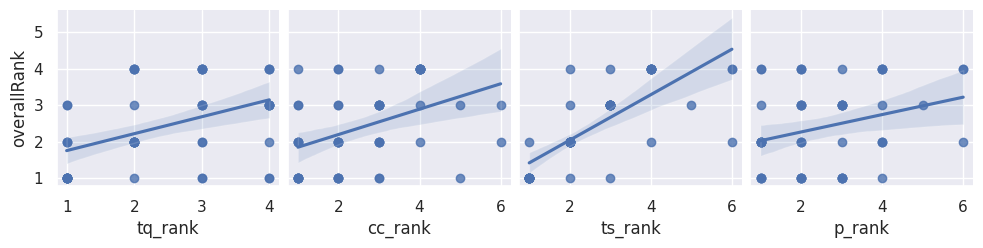

In [183]:
sns.pairplot(df_sub, x_vars=['tq_rank','cc_rank','ts_rank','p_rank'], y_vars='overallRank', kind='reg')

<AxesSubplot:>

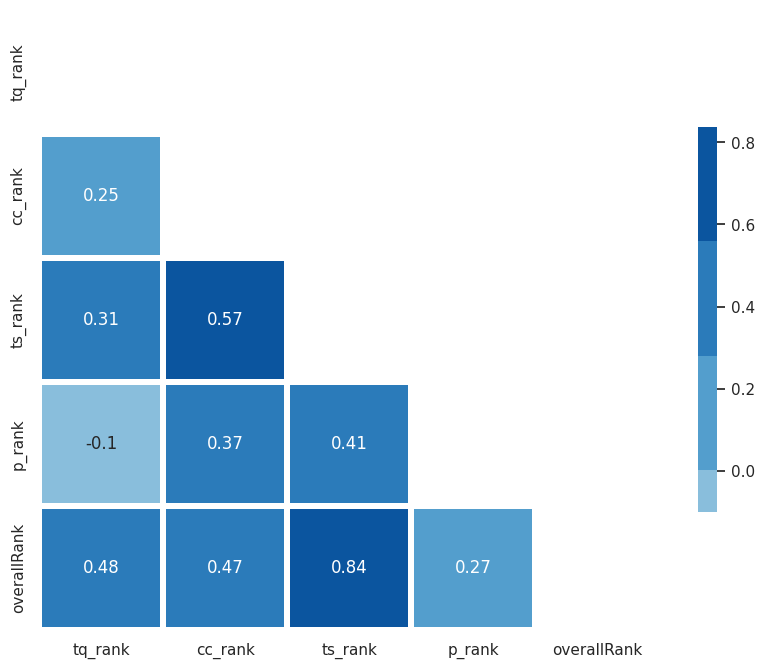

In [165]:
# correlation matrix of the dataframe
sns.set_theme(style='white')
corr = df_sub[['tq_rank','cc_rank','ts_rank','p_rank','overallRank']].corr(method='spearman')
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette('Blues')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=3, cbar_kws={'shrink': .5}, annot=True)

In [166]:
# R value is between -1 and 1, or correlation coefficient matrix, uses Pearson unlike above which uses spearman
# measures the direction and magnitude of the relationship between variables
np.corrcoef(df_sub['ts_rank'], df_sub['overallRank'])

array([[1.        , 0.76568899],
       [0.76568899, 1.        ]])

In [167]:
# covariance matrix, describes the directional relationship of linearity between two variables to determine where a linear relationship exists
df_sub.cov()

,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,total_score,count
tq_calculated,30.607130,29.543140,1.036333,-10.791717,-2.049718,0.527996,-0.427323,1.019061,-1.195545,50.394886,0.0
ts_calculated,29.543140,150.624402,38.775949,26.842944,-2.358452,-4.482002,-10.237403,-6.737033,-6.756230,245.786435,0.0
p_calculated,1.036333,38.775949,18.963708,25.259821,-0.644832,-2.107363,-2.877521,-3.327167,-1.585109,84.035811,0.0
cc_calculated,-10.791717,26.842944,25.259821,176.614130,-2.688280,-9.171822,-5.375762,-4.587855,-3.946733,217.925177,0.0
tq_rank,-2.049718,-2.358452,-0.644832,-2.688280,1.244444,0.348148,0.355556,-0.162963,0.577778,-7.741281,0.0
cc_rank,0.527996,-4.482002,-2.107363,-9.171822,0.348148,1.800000,1.070370,0.848148,0.625926,-15.233191,0.0
ts_rank,-0.427323,-10.237403,-2.877521,-5.375762,0.355556,1.070370,1.877441,1.099663,1.170370,-18.918009,0.0
p_rank,1.019061,-6.737033,-3.327167,-4.587855,-0.162963,0.848148,1.099663,1.877441,0.448148,-13.632993,0.0
overallRank,-1.195545,-6.756230,-1.585109,-3.946733,0.577778,0.625926,1.170370,0.448148,1.244444,-13.483617,0.0
total_score,50.394886,245.786435,84.035811,217.925177,-7.741281,-15.233191,-18.918009,-13.632993,-13.483617,598.142309,0.0


In [168]:
# create a regression model
model = LinearRegression()

# reshape to 2D array
ind = df_sub['ts_rank'].to_numpy()
ind = ind.reshape(-1,1)

# dependant variable
dep = df_sub['overallRank']

# test and train split
x_train, x_test, y_train, y_test = train_test_split(ind, dep, test_size=.2, random_state=18)

# create a model and fit it
model.fit(x_train, y_train)

# coefficient of determination
r_squared = model.score(x_test, y_test)
print("Coefficient of Determination: ", r_squared)

# slope
slope = model.coef_
print("Slope: ", slope)

# intercept
intercept = model.intercept_
print("Intercept: ", intercept)

# use the model to predict overall rank according to team scenario rank
y_pred = model.predict(x_test)
print("Prediction: ", y_pred)

# Sum of Square Residuals
residuals = y_test - y_pred
SSR = np.sum(residuals**2)
print("Sum of Square Residuals: ",SSR)

Coefficient of Determination:  0.8019155569001679
Slope:  [0.55495103]
Intercept:  0.96626768226333
Prediction:  [2.63112078 1.52121872 1.52121872 2.07616975 1.52121872 3.18607182
 2.63112078 3.18607182 2.63112078 1.52121872 1.52121872]
Sum of Square Residuals:  3.0973203830155565


In [169]:
# multiple linear regression analysis
ind_m = df_sub[['tq_rank', 'cc_rank', 'ts_rank', 'p_rank']]
# x_train = ind_m[:44]
# y_train = dep[:44]
# x_test = ind_m[44:]
# y_test = dep[44:]
x_train, x_test, y_train, y_test = train_test_split(ind_m.values, dep, test_size=.2, random_state=18)

model_m = LinearRegression()

model_m.fit(x_train, y_train)
print('Intercept: ', model_m.intercept_)
print('Coefficients: ', model_m.coef_)

# prediction
my_pred = model_m.predict(x_test)
print('Predicted Overall Rank: ', my_pred)

# coefficient of determination
mr_squared = model_m.score(x_test,y_test)
print('coefficient of determination: ', mr_squared)

# Mean Square Error (MSE)
# Sum of Square Residuals
mr_residuals = y_test - my_pred
mr_SSR = np.sum(mr_residuals**2)
print('Sum of Square Residuals: ', mr_SSR / len(y_test))

Intercept:  0.24507216157906386
Coefficients:  [ 0.42527441 -0.18144705  0.61208275  0.00095861]
Predicted Overall Rank:  [2.39040392 0.74096401 0.37902853 1.5335352  2.37968133 3.24727265
 3.42144117 2.8191224  3.60384684 1.1028995  1.10194088]
coefficient of determination 0.6501925255976562
Sum of Square Residuals:  0.4972469884066373


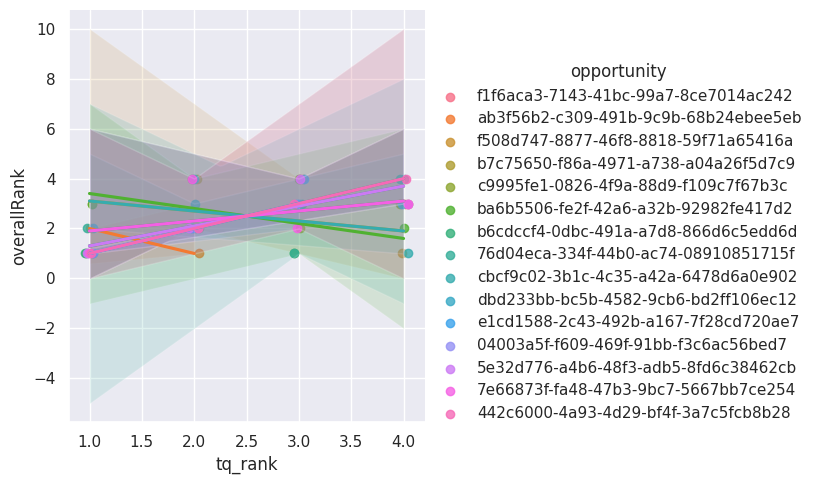

In [170]:
# scatter plot
sns.set_theme(color_codes=True)
sns.lmplot(x='tq_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

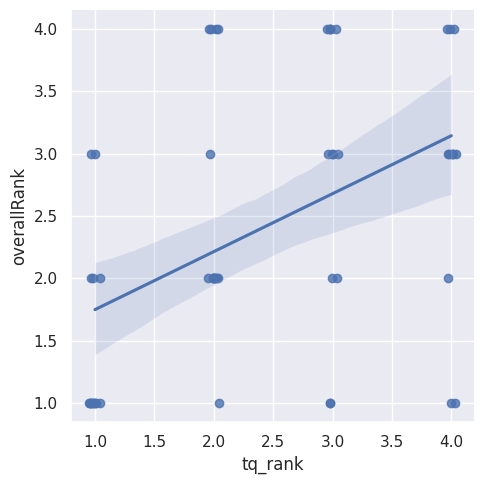

In [171]:
sns.lmplot(x='tq_rank',y='overallRank', data=df_sub,x_jitter=.05)

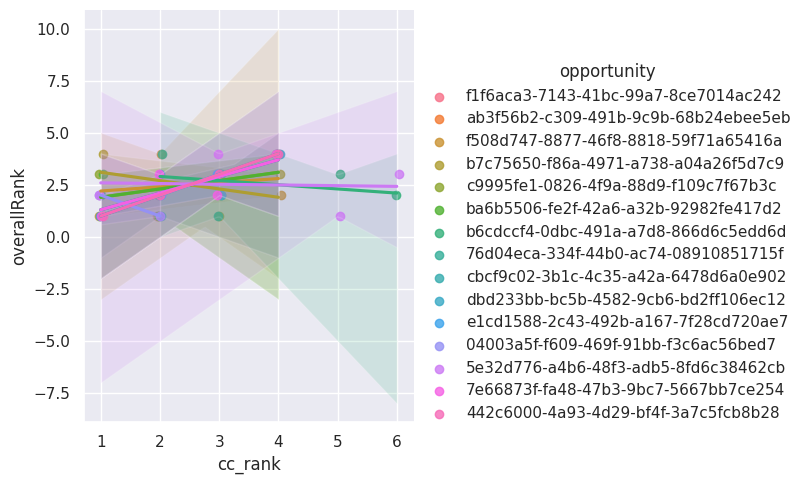

In [172]:
# df_sub.plot(x='cc_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='cc_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
sns.lmplot(x='cc_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

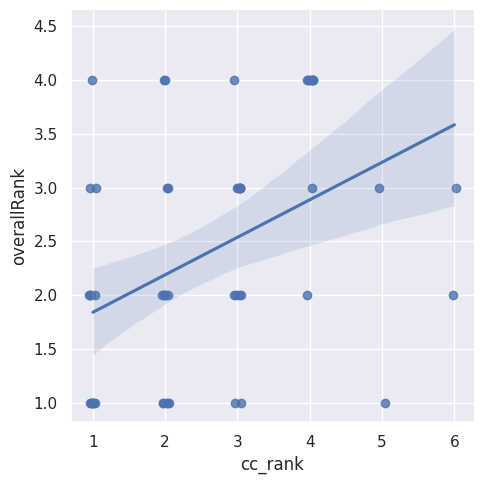

In [173]:
sns.lmplot(x='cc_rank',y='overallRank', data=df_sub,x_jitter=.05)


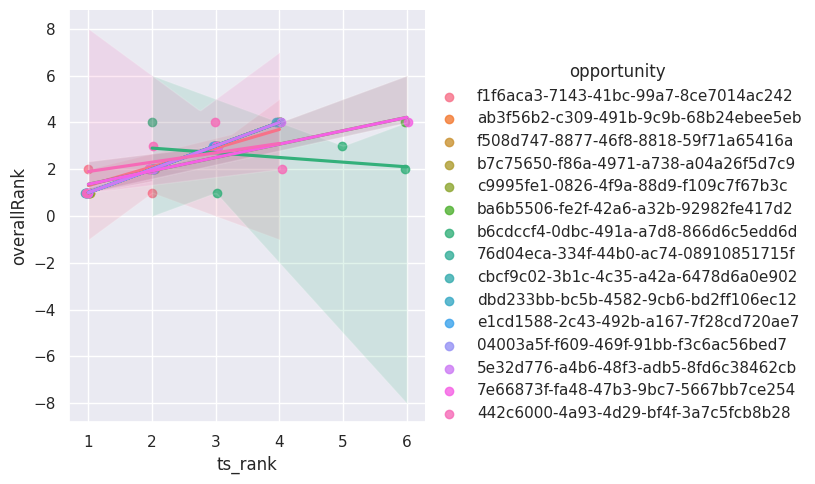

In [174]:
#df_sub.plot(x='ts_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='ts_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
# sns.regplot(x=df_sub['tq_rank'],y=df_sub['overallRank'])
sns.lmplot(x='ts_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

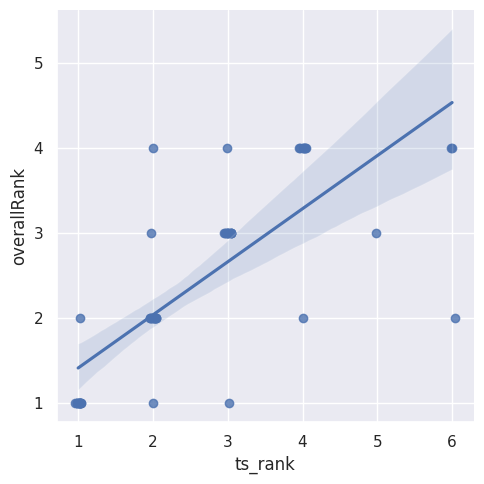

In [175]:
sns.lmplot(x='ts_rank',y='overallRank', data=df_sub,x_jitter=.05)

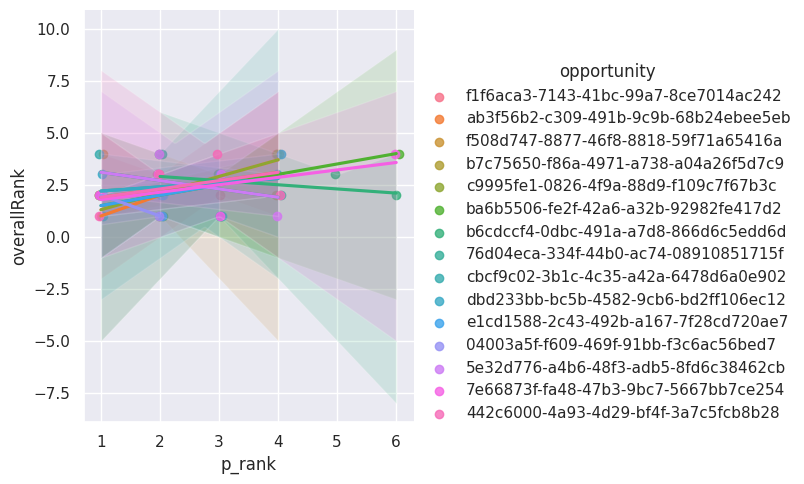

In [176]:
# df_sub.plot(x='p_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='p_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
sns.lmplot(x='p_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

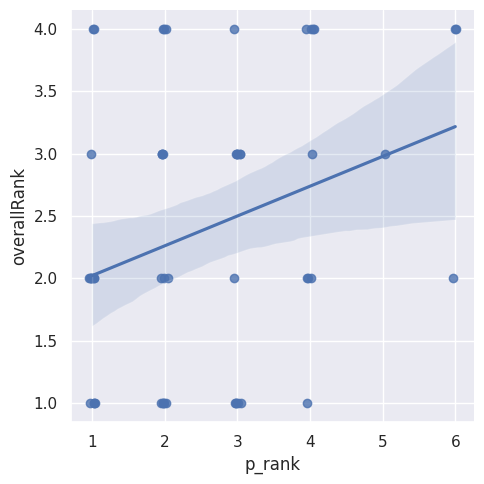

In [177]:
sns.lmplot(x='p_rank',y='overallRank', data=df_sub,x_jitter=.05)
